In [1]:
import numpy as np
import phate, magic
import scprep, scanpy
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import spearmanr, pearsonr
import pandas as pd
import leidenalg
from sklearn.preprocessing import scale

In [2]:
trajectory_data = np.load('../data/splatter_simulated_data.npz')
data = trajectory_data['data']
true_counts = trajectory_data['true_counts']
true_lib_size = true_counts.T.sum(axis=1)

In [3]:
cell_phate_op = phate.PHATE(random_state=1234, verbose=False)
cell_data_phate = cell_phate_op.fit_transform(data)

In [4]:
cell_phate_op = phate.PHATE(random_state=1234, verbose=False)
true_cell_data_phate = cell_phate_op.fit_transform(true_counts)

<Axes: >

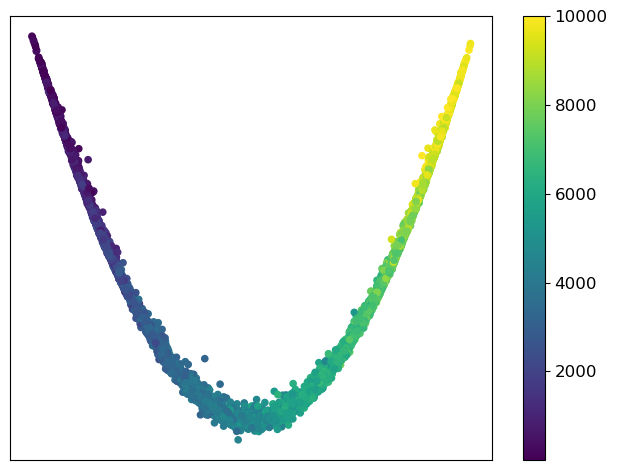

In [9]:
scprep.plot.scatter2d(true_cell_data_phate, c=trajectory_data['pseudotime'], s=20, ticks=None,
                          filename=f'figures/noiseless_time.png', cmap='viridis')

<Axes: >

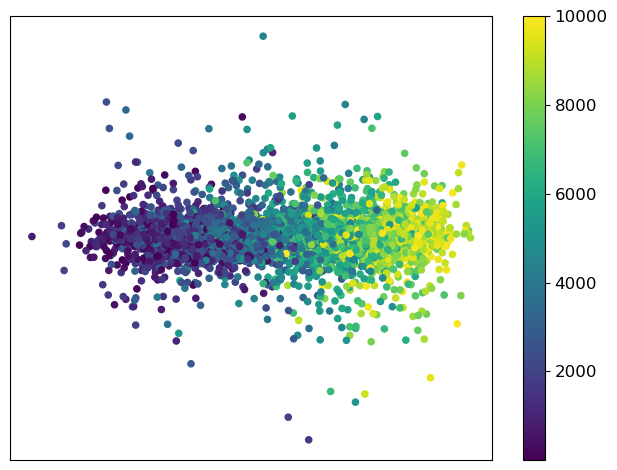

In [10]:
scprep.plot.scatter2d(cell_data_phate, c=trajectory_data['pseudotime'], s=20, ticks=None,
                          filename=f'figures/noisy_time.png', cmap='viridis')

In [5]:
true_cell_data_phate = true_cell_data_phate * [-1, 1]
cell_data_phate = cell_data_phate * [-1, 1]

<Axes: >

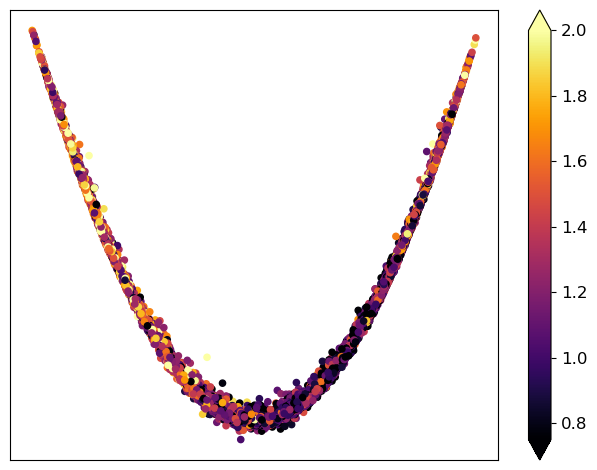

In [18]:
scprep.plot.scatter2d(true_cell_data_phate, c=true_counts[:, 2757], s=20, ticks=None, vmin=0.75, vmax=2,
                          filename=f'figures/noiseless_gene.png', cmap='inferno')

<Axes: >

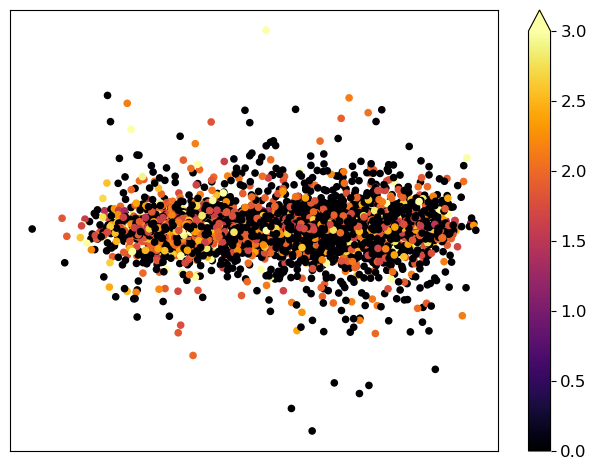

In [6]:
scprep.plot.scatter2d(cell_data_phate, c=data[:, 2757], s=20, ticks=None, vmax=3,
                          filename=f'figures/noisy_gene.png', cmap='inferno')